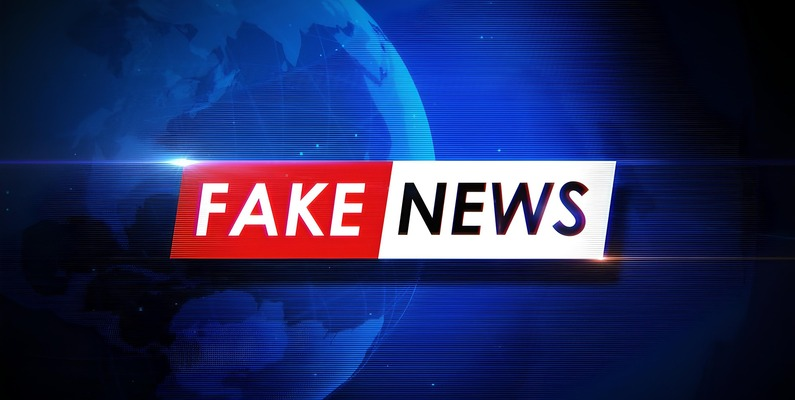

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
true =pd.read_csv('/content/True.csv')
fake =pd.read_csv('/content/Fake.csv')

In [ ]:
true

'''
Title: title of news article
Text: body text of news article
Subject: subject of news article
Date: publish date of news article
'''

'\nTitle: title of news article\nText: body text of news article\nSubject: subject of news article\nDate: publish date of news article\n'

In [ ]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
print(true['text'].isna().sum())
print(true['title'].isna().sum())
print(true['date'].isna().sum())
print(true['subject'].isna().sum())

0
0
0
0


In [ ]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
true['label'] = 0
fake['label'] = 1


In [ ]:
print(fake['text'].isna().sum())
print(fake['title'].isna().sum())
print(fake['date'].isna().sum())
print(fake['subject'].isna().sum())

0
0
0
0


In [ ]:
df = pd.concat([true, fake], axis=0)

In [ ]:
# Shuffle the data to mix real/fake articles
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df

,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",1
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",1
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",1
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",0
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",1
...,...,...,...,...,...
44893,Nigeria says U.S. agrees delayed $593 million ...,ABUJA (Reuters) - The United States has formal...,worldnews,"December 27, 2017",0
44894,Boiler Room #62 – Fatal Illusions,Tune in to the Alternate Current Radio Network...,Middle-east,"June 29, 2016",1
44895,ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...,I m convinced the Freedom From Religion group...,Government News,"Feb 27, 2016",1
44896,Republican tax plan would deal financial hit t...,WASHINGTON (Reuters) - The Republican tax plan...,politicsNews,"November 2, 2017",0


In [ ]:
df['subject'].unique()

array(['News', 'politicsNews', 'politics', 'worldnews', 'Government News',
       'left-news', 'Middle-east', 'US_News'], dtype=object)

<ipython-input-68-f115946634d3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_percentages.index, y=subject_percentages.values, palette='Set2')


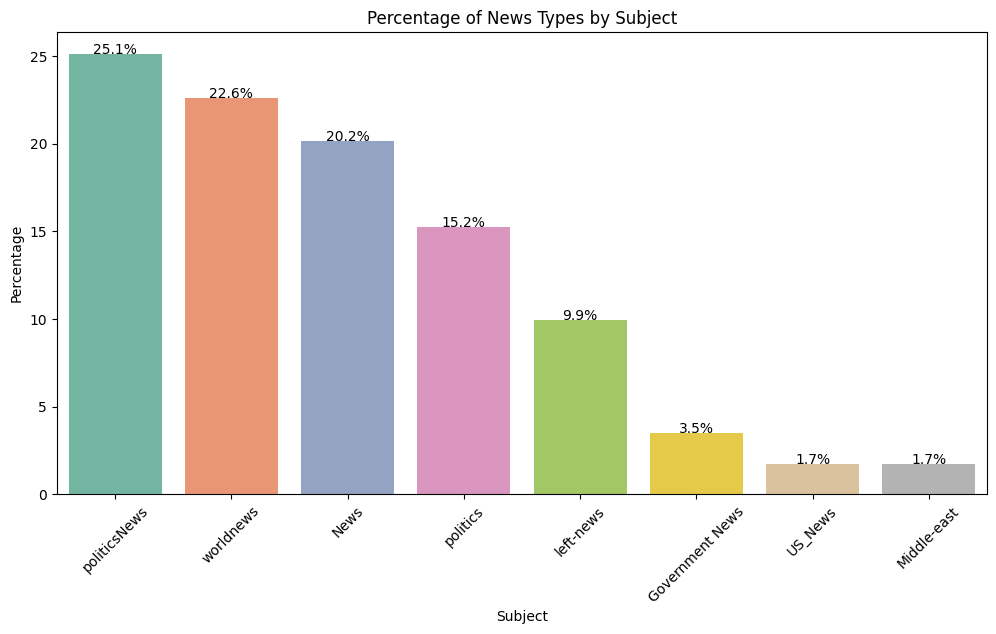

In [ ]:
subject_counts = df['subject'].value_counts()
subject_percentages = (subject_counts / len(df)) * 100


plt.figure(figsize=(12, 6))
sns.barplot(x=subject_percentages.index, y=subject_percentages.values, palette='Set2')

# Add percentage labels on top of each bar
for index, value in enumerate(subject_percentages.values):
    plt.text(index, value, f'{value:.1f}%', ha='center', fontsize=10, color='black')

plt.title("Percentage of News Types by Subject")
plt.xlabel("Subject")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df['label'].value_counts()

,count
label,
1,23481
0,21417


In [ ]:
df['content'] = df['title'] + ' ' + df['text']

In [ ]:
df.drop(['title', 'text'], axis=1, inplace=True)

,title,text,subject,date,label,content
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",1,BREAKING: GOP Chairman Grassley Has Had Enoug...
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",1,Failed GOP Candidates Remembered In Hilarious...
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",1,Mike Pence’s New DC Neighbors Are HILARIOUSLY...
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",0,California AG pledges to defend birth control ...
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",1,AZ RANCHERS Living On US-Mexico Border Destroy...
...,...,...,...,...,...,...
44893,Nigeria says U.S. agrees delayed $593 million ...,ABUJA (Reuters) - The United States has formal...,worldnews,"December 27, 2017",0,Nigeria says U.S. agrees delayed $593 million ...
44894,Boiler Room #62 – Fatal Illusions,Tune in to the Alternate Current Radio Network...,Middle-east,"June 29, 2016",1,Boiler Room #62 – Fatal Illusions Tune in to t...
44895,ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...,I m convinced the Freedom From Religion group...,Government News,"Feb 27, 2016",1,ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...
44896,Republican tax plan would deal financial hit t...,WASHINGTON (Reuters) - The Republican tax plan...,politicsNews,"November 2, 2017",0,Republican tax plan would deal financial hit t...


**re:** Regular expressions library used for pattern matching and text cleaning.

**nltk:** Natural Language Toolkit — a popular library for text preprocessing and NLP tasks.

**stopwords:** Common words like "is", "the", "and", "in" that don't carry important meaning in text analysis.

**PorterStemmer:** A stemming algorithm that reduces words to their root form (e.g., "playing" → "play").






In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
ps = PorterStemmer()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove special characters/numbers
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

df['cleaned_content'] = df['content'].apply(clean_text)

# convert text data into numerical data

TF-IDF stands for:

Term Frequency (TF): How frequently a word appears in a document.
Inverse Document Frequency (IDF): How unique or rare a word is across all documents.

👉 It gives higher importance to rare words and lower importance to common words like "the", "and", "is", etc.



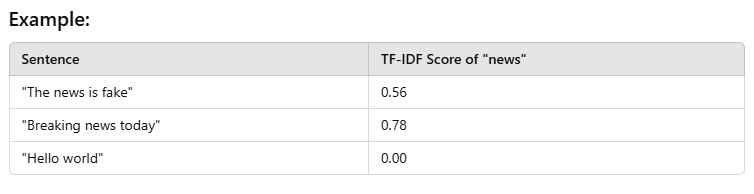

👉 max_features=5000 means it will select the top 5000 most important words from all the articles.

**fit_transform():**
First learns the vocabulary from the text data.
Then converts the text into a numerical array.

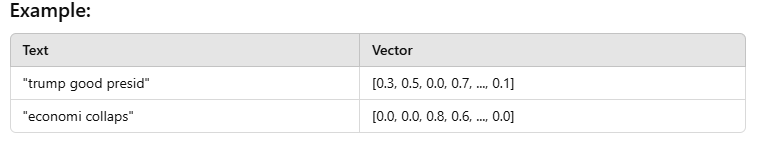



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_content']).toarray()
y = df['label']



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Naive Bayes

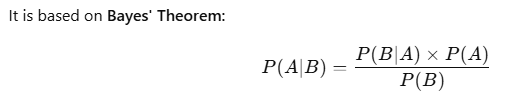

It assumes that all features are independent of each other — which is not always true in real life.

**It works on frequency-based features like: **

Word Count

TF-IDF (Term Frequency - Inverse Document Frequency)


The model learns the relationship between TF-IDF features (X_train) and labels (y_train).

It tries to predict whether each news article is Fake or Real.


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9287305122494433
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4311
           1       0.93      0.94      0.93      4669

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



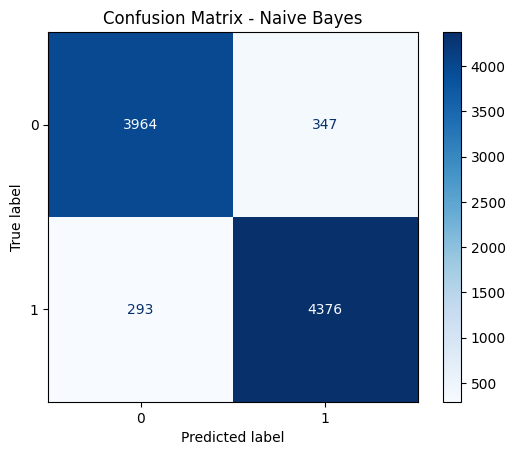

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_nb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


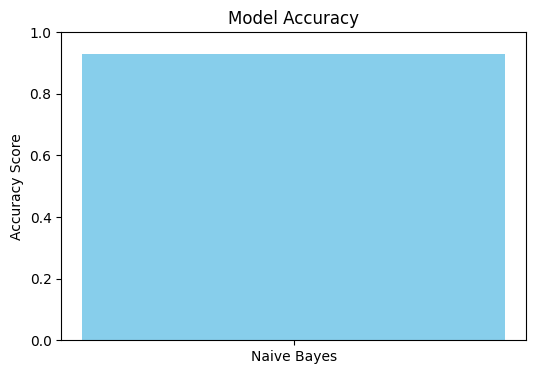

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(["Naive Bayes"], [accuracy_score(y_test, y_pred_nb)], color='skyblue')
plt.ylim(0, 1)
plt.title("Model Accuracy")
plt.ylabel("Accuracy Score")
plt.show()


# 2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.987305122494432
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4311
           1       0.99      0.98      0.99      4669

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



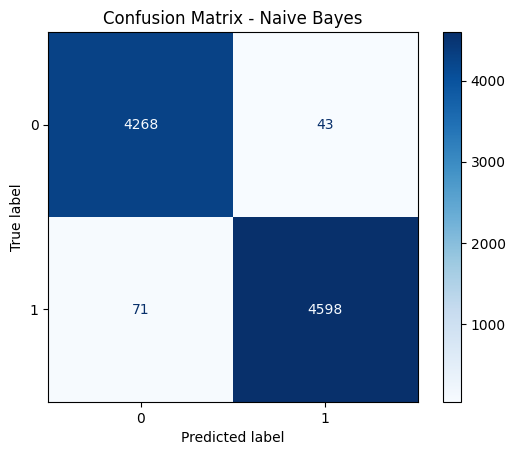

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_lr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [ ]:
import joblib

joblib.dump(lr, 'fake_news_model.pkl')  # Save the best model
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']